In [198]:
%pylab inline
!pip install scikit-plot
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Populating the interactive namespace from numpy and matplotlib


In [0]:
# Набор данных
X, y = make_classification(n_samples=5000, n_features=2, n_redundant=0, n_informative=2,
                           random_state=5)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [238]:
# Обучение и применение метода опорных векторов.
svc = SVC(random_state=0, tol=1e-5, kernel='linear')
svc.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=1e-05,
    verbose=False)

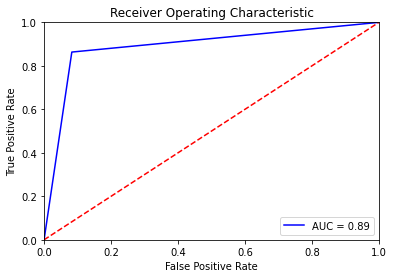

In [239]:
# ROC_AUC и PR-AUC
preds = svc.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.96')

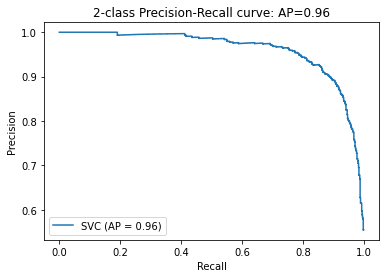

In [240]:
y_score = svc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(svc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

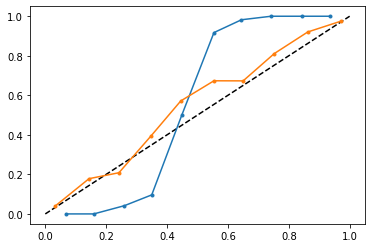

In [241]:
# Калибровка вероятностей

# неоткалиброванная
uncalibrated_svc = svc
uncalibrated_y = uncalibrated_svc.decision_function(X_test)

# откалиброванные 
calibrated_svc = CalibratedClassifierCV(svc, method='sigmoid', cv=5)
calibrated_svc.fit(X_train, y_train)
calibrated_y = calibrated_svc.predict_proba(X_test)[:, 1]


# Диаграмма надежности - график зависимости относительной частоты наблюдаемого (ось Y) от прогнозируемой частоты вероятности (ось X).
fop_uncalibrated, mpv_uncalibrated = calibration_curve(y_test, uncalibrated_y, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(y_test, calibrated_y, n_bins=10)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.')
pyplot.show()

In [0]:
# just plot the dataset first
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:20,0], sv[:20,1], c='k', marker='x', s=15, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

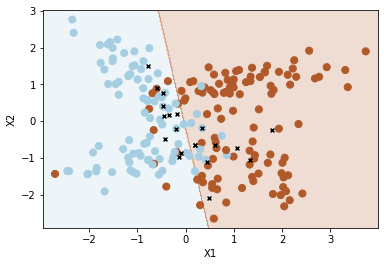

Number of support vectors:  1384


In [243]:
plot_svc(svc, X[100:300, :], y[100:300])

In [244]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(solver='lbfgs',random_state=0)
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

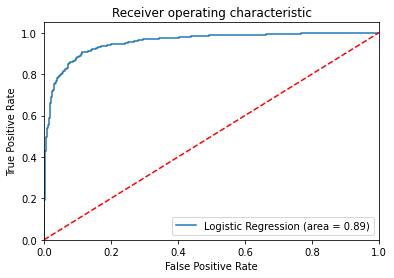

In [245]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred = logistic_regression.predict(X_test)
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
def plot_reg(reg, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

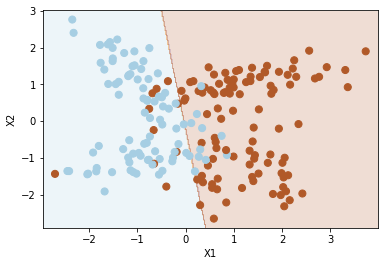

In [247]:
plot_reg(logistic_regression, X[100:300, :], y[100:300])